Pytorch is by facebook and tensor flow is by google
- Keras is just an interface to interact easily with the above deep learning packages. It just a wrapper

In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

Importing the HandWritten data set

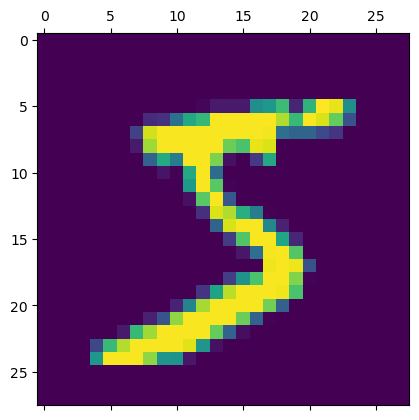

In [87]:
dataset = keras.datasets.mnist.load_data()
#Displaying the first Image contents
plt.matshow(dataset[0][0][0])

In [88]:
(x_train,y_train),(x_test,y_test) = dataset

In [89]:
x_train.shape # Total number of training datasets => 60,000

(60000, 28, 28)

Converting it into a 1D array to input the neurons

In [90]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened = x_train_flattened/255
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened = x_test_flattened/255
x_train_flattened.shape


(60000, 784)

In [91]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Creation of the Nueral Network
- A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
- A Sequential model is **not appropriate** when:
    - Your model has multiple inputs or multiple outputs
    - Any of your layers has multiple inputs or multiple outputs
    - You need to do layer sharing
    - You want non-linear topology (e.g. a residual connection, a multi-branchmodel)


- **sparse_categorical_crossentropy**:
    - In a multi-class classification problem, we have more than two target classes that the model has to classify each input into. The sparse_categorical_crossentropy loss function computes the cross-entropy loss between the true labels and predicted probabilities.

In [105]:
handwritten_model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = "sigmoid",name = "layer1"),
])

handwritten_model.compile(
   optimizer='adam',
   loss= 'sparse_categorical_crossentropy',
   metrics=['accuracy'],
)

handwritten_model.fit(x=x_train_flattened,y=y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4739 - accuracy: 0.8739
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9264


In [106]:
handwritten_model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 991us/step - loss: 0.2674 - accuracy: 0.9249


[0.26737165451049805, 0.9248999953269958]

# Understanding the Confusion Matrix

313/313 [==============================] - 0s 855us/step


Text(0.5, 1.0, 'Confusion Matrix')

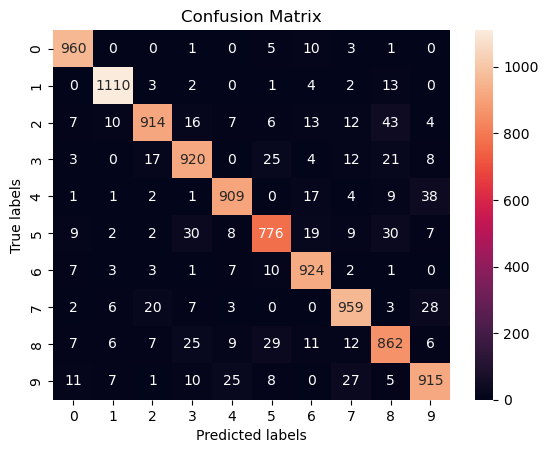

In [107]:
from sklearn import metrics
from seaborn import heatmap
y_predicted = handwritten_model.predict(x_test_flattened)
y_predicted = [np.argmax(x) for x in y_predicted]
confusion_matrix = metrics.confusion_matrix(y_test,y_predicted)
heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')


# Adding Hidden Layer to the model to imporve accuracy

In [108]:
handwritten_model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = "relu",name = "layer1"),
    keras.layers.Dense(10,input_shape = (784,),activation = "sigmoid",name = "layer2"),
])

handwritten_model.compile(
   optimizer='adam',
   loss= 'sparse_categorical_crossentropy',
   metrics=['accuracy'],
)

handwritten_model.fit(x=x_train_flattened,y=y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2745 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0521 - accuracy: 0.9842


In [110]:
handwritten_model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9754


[0.08012928068637848, 0.9753999710083008]

313/313 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Confusion Matrix')

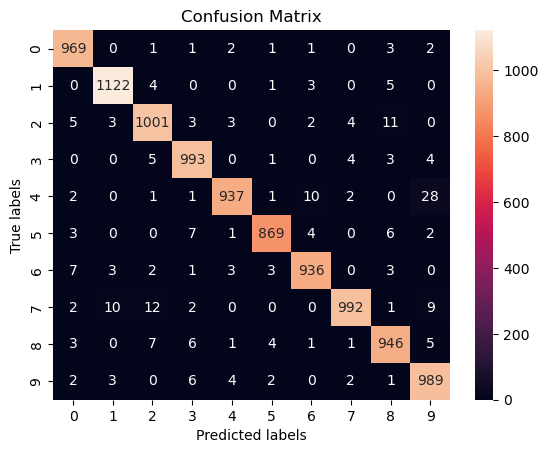

In [109]:
from sklearn import metrics
from seaborn import heatmap
y_predicted = handwritten_model.predict(x_test_flattened)
y_predicted = [np.argmax(x) for x in y_predicted]
confusion_matrix = metrics.confusion_matrix(y_test,y_predicted)
heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')